In [ ]:
#Problem 1

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
new = pd.read_csv("Desktop/incomes.txt",names=['Income'])
new.describe()

,Income
count,200.000000
mean,87585.500000
std,18077.867302
min,49300.000000
25%,74075.000000
50%,85800.000000
75%,100000.000000
max,136000.000000


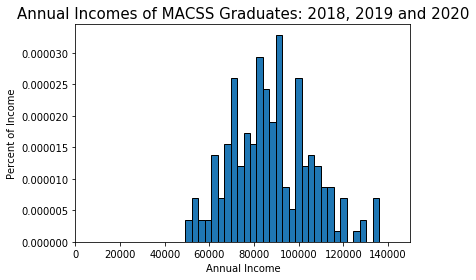

In [74]:
number = 30
plt.hist(new['Income'], number, density=True, edgecolor='k')
plt.title('Annual Incomes of MACSS Graduates: 2018, 2019 and 2020', size=15)
plt.xlabel('Annual Income')
plt.ylabel('Percent of Income')
plt.xlim([0, 150000])
plt.show()

In [29]:
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt

In [44]:
def lognorm_pdf(x, mean, std, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob = 1.0 - sts.lognorm.cdf(cut_lb, std, scale=np.exp(mean))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob = sts.lognorm.cdf(cut_ub, std, scale=np.exp(mean))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob = (sts.lognorm.cdf(cut_ub, std, scale=np.exp(mean)) -
                       sts.lognorm.cdf(cut_lb, std, scale=np.exp(mean)))
    pdf_vals = ((1/(x * std * np.sqrt(2 * np.pi)) *
                 np.exp( - (np.log(x) - mean) ** 2 / (2 * std ** 2))) /
                 prob)
    return pdf_vals

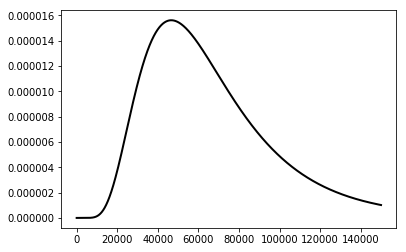

In [72]:
distribution = np.linspace(1, 150000, 3000)
mean0 = 11
std0 = 0.5
plt.plot(distribution, lognorm_pdf(distribution, mean0, std0, 0, 150000),
        linewidth=2, color='k')
plt.show()

In [57]:
def log_lognorm(x, mean, std, cut_lb, cut_ub):
    pdf_vals = lognorm_pdf(x, mean, std, cut_lb, cut_ub)
    ln_val = np.log(pdf_vals)
    log_val = ln_val.sum()
    return log_val
print('Likelihood:', log_lognorm(new['Income'], mean0, std0, 0, 150000))

Likelihood: -2379.094808613854


In [66]:
def c(params, *args):
    mean, std = params
    x, cut_lb, cut_ub = args
    log_val = log_lognorm(x, mean, abs(std), cut_lb, cut_ub)
    return -log_val

In [68]:
mean1 = 10
std1 = 0.5
params1 = np.array([mean1, std1])
args1 = (new['Income'], 0, 150000)
result = opt.minimize(c, params1, args=(args1))
mean_MLE = result.x[0]
std_MLE = - result.x[1]
print('ML estimates for mean', mean_MLE)
print('ML estimates for standard deviation ', std_MLE)
print("Maximum Likelihood:",log_lognorm(new['Income'], mean_MLE, std_MLE, 0, 150000))

ML estimates for mean 11.361663637443739
ML estimates for standard deviation  0.2116523198113215
Maximum Likelihood: -2240.8562618863116


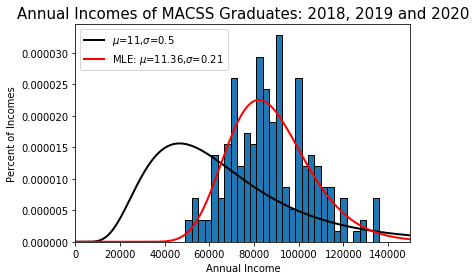

In [71]:
plt.hist(new['Income'], number, density=True, edgecolor='k')
plt.plot(distribution, lognorm_pdf(distribution, mean0, std0, 0, 150000),
         linewidth=2, color='k', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')
plt.plot(distribution, lognorm_pdf(distribution, mean_MLE, std_MLE, 0, 150000),
         linewidth=2, color='r', label='MLE: $\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper left')
plt.title('Annual Incomes of MACSS Graduates: 2018, 2019 and 2020', size=15)
plt.xlabel('Annual Income')
plt.ylabel('Percent of Incomes')
plt.xlim([0, 150000]) 
plt.show()

In [79]:
result0 = result.hess_inv
err_mean = np.sqrt(result0[0,0])
err_std = np.sqrt(result0[1,1])
per_err_mean = err_mean * 100/mean_MLE
per_err_std = err_std * 100/std_MLE
print('Variance-Covariance Matrix = ', result0)
print('Standard error for mean estimate = ', err_mean)
print('Standard error for standard deviation estimate = ', err_std)
print('mean percent', per_err_mean,"%")
print('standard deviation percent', per_err_std,"%")

Variance-Covariance Matrix =  [[ 2.32291150e-04 -1.22084555e-05]
 [-1.22084555e-05  1.31043145e-04]]
Standard error for mean estimate =  0.015241100667834429
Standard error for standard deviation estimate =  0.011447407771720635
mean percent 0.13414497343158036 %
standard deviation percent 5.408590740666336 %


In [85]:
mean2, std2 = np.array([500, 0])
log_lognorm0 = log_lognorm(new['Income'], mean0, std0, 0, 150000)
log_lognorm1 = log_lognorm(new['Income'], mean_MLE, std_MLE, 0, 150000)
ratio = 2 * (log_lognorm1 - log_lognorm0)
chi_squ_p = 1.0 - sts.chi2.cdf(ratio, 2)
print('Hypothesis Value Log-likelihood', log_lognorm0)
print('MLE log likelihood', log_lognorm1)
print('Likelihood Ratio Value', ratio)
print('Chi Squared of HO with 2 degrees of freedom p-value = ', chi_squ_p)

Hypothesis Value Log-likelihood -2379.094808613854
MLE log likelihood -2240.8562618863116
Likelihood Ratio Value 276.4770934550852
Chi Squared of H0 with 2 degrees of freedom p-value =  0.0


Because the p-value is less than 0.05, we reject the null hypothesis that the probability that the data in incomes.txt came from the distribution of f(x|mean=11,std=0.5). 

In [86]:
chance1 = 1 - sts.lognorm.cdf(100000, std_MLE, scale=np.exp(mean_MLE))
chance2 = sts.lognorm.cdf(75000, std_MLE, scale=np.exp(mean_MLE))
print(chance1)
print(chance2)

0.23740610404728257
0.25960981766313806


There is 23.74% to earn more than 100000 and there is 25.96% to earn less than 75000. 

In [ ]:
#Problem 2

In [88]:
new = pd.read_csv("Desktop/sick.txt").astype('float64')
new.describe()

,sick,age,children,avgtemp_winter
count,200.000000,200.000000,200.000000,200.000000
mean,1.008600,40.683850,1.674950,44.041250
std,0.504222,11.268686,0.969761,11.101977
min,0.040000,12.810000,0.000000,16.500000
25%,0.650000,33.967500,0.970000,36.112500
50%,0.960000,41.015000,1.560000,43.300000
75%,1.322500,47.750000,2.322500,52.172500
max,2.800000,74.890000,4.960000,68.600000


In [89]:
def norm_pdf(x, std):
    std=abs(std)
    pdf_vals = (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x) ** 2 / (2 * std ** 2))                  
    return pdf_vals

In [91]:
def log_norm(y, x1, x2, x3, b0, b1, b2, b3, std):
    pdf_vals = norm_pdf(y - b0 - b1 * x1 - b2 * x2 - b3 * x3, std)
    ln_val = np.log(pdf_vals)
    log_val = ln_val.sum()
    return log_val

In [92]:
def c1(params,*args):
    b0, b1, b2, b3, std = params
    y, x1, x2, x3 = args
    log_val = log_norm(y, x1, x2, x3, b0, b1, b2, b3, std) 
    return -log_val

In [102]:
b0_i, b1_i, b2_i, b3_i, std_i = (0,0,0,0,1)
x1, x2, x3 = new['age'], new['children'], new['avgtemp_winter']
y = new['sick']
params_i = np.array([b0_i, b1_i, b2_i, b3_i, std_i])
result = opt.minimize(c1, params_i,(y, x1, x2, x3))
log_likeli = - result.fun
b0_MLE, b1_MLE, b2_MLE, b3_MLE, std_MLE = result.x
print('beta 0=', b0_MLE)
print('beta 1=', b1_MLE)
print('beta 2=', b2_MLE)
print('beta 3=', b3_MLE)
print('standard deviation=', std_MLE)
print("Value of the log likelihood function:",log_likeli)

C:\Users\Qian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Qian\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\Qian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


beta 0= 0.251646963768576
beta 1= 0.012933403043275343
beta 2= 0.4005015615268546
beta 3= -0.009991713968585248
standard deviation= 0.003017766027112541
Value of the log likelihood function: 876.8650470218196


In [103]:
va_co = result.hess_inv
print('Variance-Covariance Matrix = ', va_co)

Variance-Covariance Matrix =  [[ 8.95220732e-07  1.18060705e-08 -2.02774294e-07 -2.27656435e-08
   3.36234635e-09]
 [ 1.18060705e-08  3.89770154e-09 -3.43642499e-08 -2.55579432e-09
   2.11698918e-11]
 [-2.02774294e-07 -3.43642499e-08  3.56241307e-07  2.27346736e-08
  -1.86687499e-09]
 [-2.27656435e-08 -2.55579432e-09  2.27346736e-08  2.01821875e-09
  -4.81914135e-11]
 [ 3.36234635e-09  2.11698918e-11 -1.86687499e-09 -4.81914135e-11
   2.31587509e-08]]


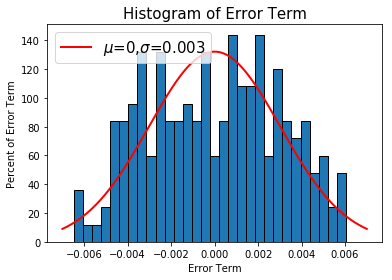

In [106]:
plt.hist(y - b0_MLE - b1_MLE * x1 - b2_MLE * x2 - b3_MLE * x3, number, density=True, edgecolor='k')
distribution = np.linspace(-0.007,0.007,1000)
plt.plot(distribution, norm_pdf(distribution, std_MLE),
         linewidth=2, color='r', label='$\mu$=0,$\sigma$=0.003')
plt.legend(loc='upper left', fontsize=15)
plt.title('Histogram of Error Term', fontsize=15)
plt.xlabel('Error Term')
plt.ylabel('Percent of Error Term')
plt.show()

In [107]:
b0_p, b1_p, b2_p, b3_p, std_p = 1, 0, 0, 0, 0.1
log_norm0 = log_norm(y, x1, x2, x3, b0_p, b1_p, b2_p, b3_p, std_p)
ratio = 2 * ((-result.fun) - log_norm0)
chi_squ_p = 1.0 - sts.chi2.cdf(ratio, 5)
print('Hypothesis Value Log-likelihood', log_norm0)
print('MLE Log Likelihood', -result.fun)
print('Likelihood Ratio Value', ratio)
print('Chi Squared of H0 with 5 degrees of freedom p-value = ', chi_squ_p)

Hypothesis Value Log-likelihood -2253.700688042125
MLE Log Likelihood 876.8650470218196
Likelihood Ratio Value 6261.131470127889
Chi Squared of H0 with 5 degrees of freedom p-value =  0.0


Because p-value is less than 0.05, we reject the null hypothesis. Thus, the likelihood that age, number of children, and average winter temperature have no effect on the
number of sick days is 0%. 